In [909]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import gamma, beta
from scipy.integrate import dblquad


import importlib

import base, bivariate, marginals, utils, tests, plots

importlib.reload(base)
importlib.reload(utils)
importlib.reload(bivariate)
importlib.reload(marginals)
importlib.reload(tests)
importlib.reload(plots)


plt.rcParams['figure.figsize'] = (6.4, 4.8)
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.dpi'] = 75

In [897]:
#model = bivariate.StudentT(df = 5, Q = 0.7)
#model = bivariate.BivariateNormalMix(Q1 = 0.5, Q2 = -0.25, p = 0.1, adj = 1e-2)
model1 = bivariate.StudentT(Q = 0.5, df = 10)
#model2 = bivariate.Normal(Q = 0.5)

#model = bivariate.Clayton(alpha = 0.5)
#model = bivariate.Gumbel(delta = 1)

#model1 = bivariate.Normal(Q = 0.3)

In [877]:
#u1_sim, u2_sim = bivariate.StudentT(df = 5, Q = 0.9).simulate(n = 10000)

#model = bivariate.Gumbel(delta = 1.5)
#u1_sim, u2_sim = model2.simulate(n = 500)

#model2 = bivariate.StudentT()
#model2.fit(u1_sim, u2_sim)

u1_sim, u2_sim = model1.simulate(n = 500)

model2 = bivariate.StudentT()
model2.fit(u1_sim, u2_sim)

In [878]:
print(model2.summary())

                           Bivariate Copula Summary                           
Model Name:                  StudentT   Log-Likelihood:                76.3749
Model Family:              Elliptical   AIC:                          -72.3749
Method:                          CMLE   BIC:                         -140.3206
Num. Params:                        2   Kendall's Tau:                  0.3420
Num. Obs:                         500   Spearman's Rho:                    nan
Date:                Sun, Feb 04 2024   Upper Tail Depend.:                 NA
Time:                        21:32:47   Lower Tail Depend.:                 NA
                                                                              
                                                                              
                             Parameter Estimates                              
             coef    std err       h0          t       P>|t|    95% Conf. Int.
----------------------------------------------------

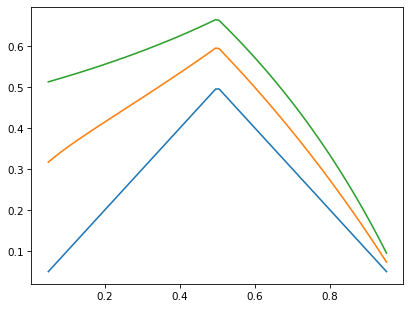

In [879]:
q_range = utils.get_u_range(5e-2, range_num = 100)

f, ax = plt.subplots()
ax.plot(q_range, np.where(q_range > 0.5, 1 - q_range, q_range))

Q = -0.5
models = [bivariate.Clayton(alpha = 0.5),
          bivariate.Clayton(alpha = 1)]


for model in models:
    ax.plot(q_range, model.quantile_dependance(q_range))
    


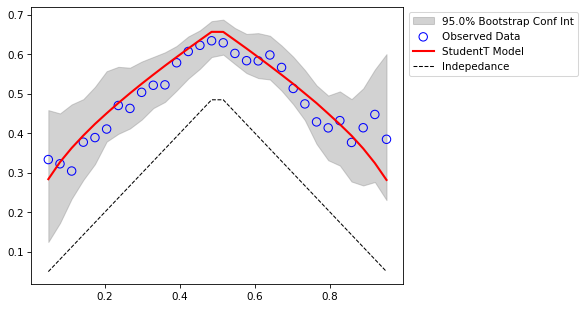

In [880]:
ax = plots.quantile_dependance(u1_sim, u2_sim, copula = model1, copula_label = "StudentT Model", 
                               show_indep = True, boot = True)

In [881]:
#print(model2.summary())

In [882]:
#marginal1 = marginals.StudentT(mean = 2, stdev = 1)
#x1 = marginal1.simulate(n = 1000)


#marginal2 = marginals.StudentT()
#marginal2.fit(x1)

In [883]:
#print(marginal2.summary())

In [884]:
copula = bivariate.Clayton(alpha = 0.5)
u1, u2 = utils.get_u_grid()

<Axes3DSubplot:>

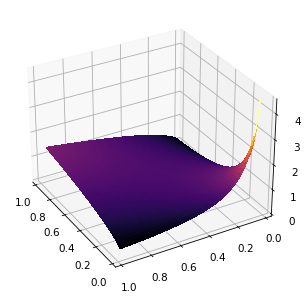

In [885]:
vis.copula_3d_surf(copula, adj = 3e-2, azim = 150, elev = 30, cmap = "inferno")

<AxesSubplot:>

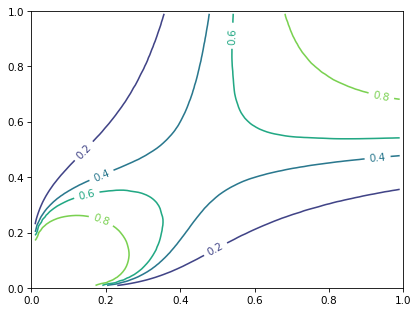

In [886]:
vis.copula_contour(copula, num_levels = 5)

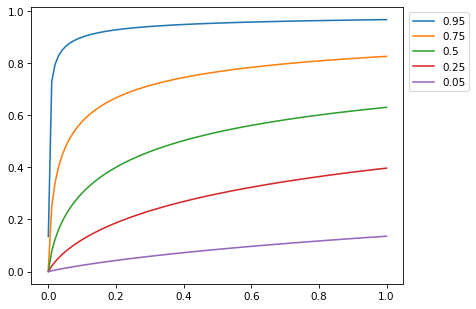

In [887]:
ax = vis.copula_quantile_curves(copula)

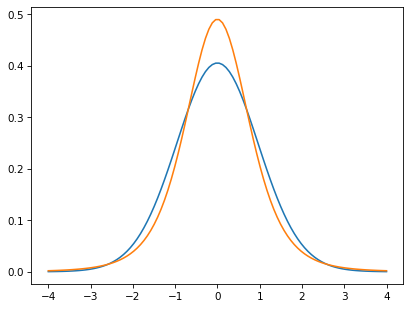

In [915]:
def skew_student_t(z, eta, lam):
    const_C = gamma((eta + 1) / 2) / (np.sqrt(np.pi * (eta - 2)) * gamma(eta / 2))
    const_A = 4 * lam * const_C * (eta - 2) / (eta - 1)
    const_B = np.sqrt(1 + 3 * (lam**2) - (const_A ** 2))
    denom = np.where(z < -const_A/const_B, 1 - lam, 1 + lam)
    return const_B * const_C * np.power((1 + 1/(eta -2) * np.square((const_B * z + const_A)/denom)), -(eta+1)/2)

x_range = np.linspace(-4, 4, 100)

marginal = marginals.StandardSkewedT(5, 0)

pdf = skew_student_t(x_range, 50, 0)
f, ax = plt.subplots()
ax.plot(x_range, pdf)
ax.plot(x_range, marginal.pdf(x_range))

In [842]:
def skew_generalized_t(x, mu, sigma, lam, p, q):
    v = q**(-1/p) * ((3*lam**2 + 1)*(beta(3/p, q - 2/p)/beta(1/p,q)) - 4*lam**2*(beta(2/p, q - 1/p)/beta(1/p,q))**2)**(-1/2)

    m = 2*v*sigma*lam*q**(1/p)*beta(2/p,q - 1/p)/beta(1/p,q)   

    fx = p  / (2*v*sigma*q**(1/p)*beta(1/p,q)*(abs(x-mu+m)**p/(q*(v*sigma)**p)*(lam*np.sign(x-mu+m)+1)**p + 1)**(1/p + q))

    return fx
    

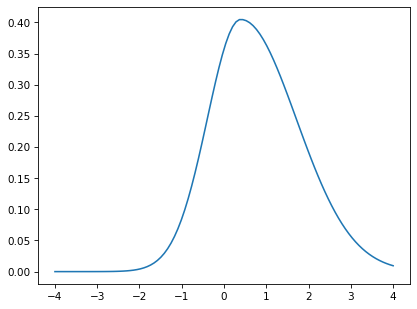

In [857]:
f, ax = plt.subplots()

pdf = skew_generalized_t(x_range, 0, 1, -0.25, 2, 1000)
ax.plot(x_range, pdf)